# **Supervised Learning**: Session 1
## **1. Supervised and Unsupervised Learning:**
**Supervised learning** is a type of machine learning where the model is trained on <font color="#0571D3">labeled data</font>. This means that each training example includes both the input data and the correct output. The model learns to make predictions or classifications based on this data. For example, predicting house prices based on historical data.

**Unsupervised learning** is a type of machine learning where the model is trained on <font color="#6DE5B9">unlabeled data</font>. The goal is to find hidden patterns or structures within the data without predefined labels. For example, grouping customers into segments based on their purchasing behavior.

<img src="https://drive.google.com/uc?export=view&id=14ArH9NOoR3GcyPs6zMLkqKBvs_H3MTuy" alt="Supervised Learning Workshop" width="500">


[Scikit-learn for supervised learning](https://scikit-learn.org/stable/supervised_learning.html)

[Machine Learning Notebooks](https://github.com/maykulkarni/Machine-Learning-Notebooks)

### Supervised Learning Example




In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris, load_diabetes

data = load_iris()

df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target


df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
list(data.target_names)

['setosa', 'versicolor', 'virginica']

In [ ]:
target_counts = df['target'].value_counts()
print(target_counts)

target
0    50
1    50
2    50
Name: count, dtype: int64


### Unsupervised Learning Example

In [ ]:
df = pd.read_csv("./Mall_Customers.csv")

In [ ]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## **2. Types of Supervised Learning**



 ### **1.   Classification**




Is where the target feature is categorical. The goal is to assign input data to one of several predefined categories. Often, these categories are binary (e.g., 0 or 1), but they can also include multiple labels such as 'spam' or 'ham'.

In [ ]:
data = load_iris()

df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target


df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


<img src="https://content.codecademy.com/programs/machine-learning/k-means/iris.svg" alt="Supervised Learning Workshop" width="600">

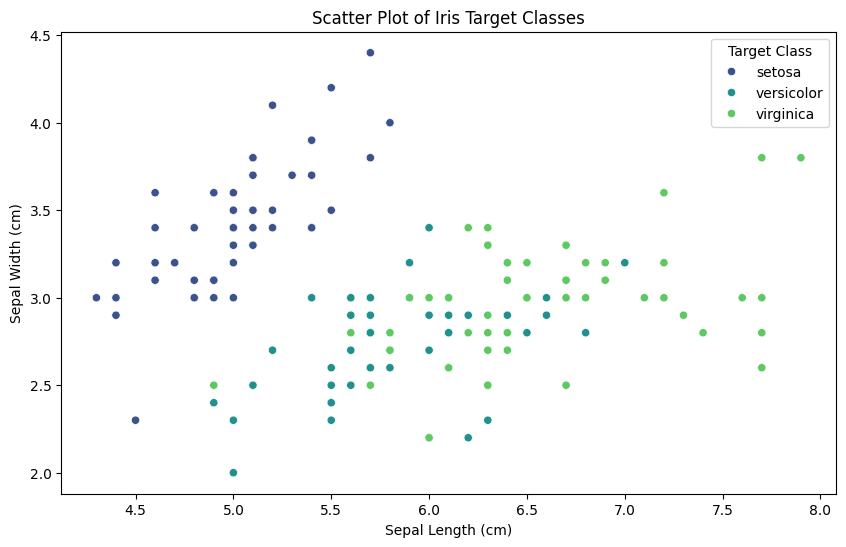

In [ ]:
df['target_label'] = df['target'].map(dict(enumerate(data.target_names)))

plt.figure(figsize=(10, 6))
sns.scatterplot(x='sepal length (cm)', y='sepal width (cm)', hue='target_label', palette='viridis', data=df)
plt.title('Scatter Plot of Iris Target Classes')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.legend(title='Target Class')
plt.show()



### **2.   Regression**



Is where the target feature is continuous. The goal is to predict a numerical value based on input data. Common examples include predicting prices, temperatures, or other measurable quantities.

In [ ]:
diabetes = load_diabetes()
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df['target'] = diabetes.target


df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


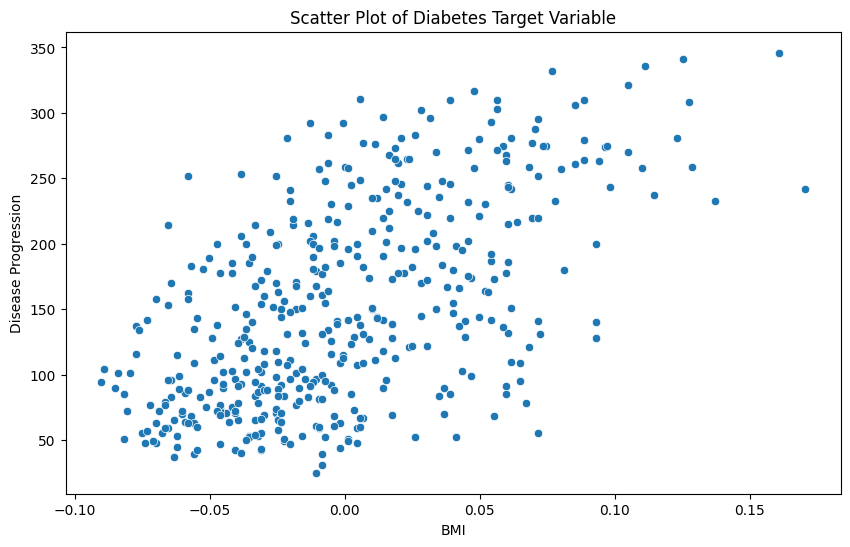

In [ ]:
# Plot the distribution of the target variable using a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='bmi', y='target', data=df)
plt.title('Scatter Plot of Diabetes Target Variable')
plt.xlabel('BMI')
plt.ylabel('Disease Progression')
plt.show()

## **3. Supervised Learning Algorithms:**

#### **1. k-Nearest Neighbor k-NN**

<img src="https://drive.google.com/uc?export=view&id=1SFAW8nRk7HoG2KNzsvgKNPPSY_2MTs0x" alt="Supervised Learning Workshop" width="500">

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris = load_iris(as_frame=True)
X = iris.data[["sepal length (cm)", "sepal width (cm)"]]
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

clf = Pipeline(
    steps=[("scaler", StandardScaler()), ("knn", KNeighborsClassifier(n_neighbors=11))]
)

In the context of k-Nearest Neighbors (k-NN) classification, the weights parameter determines how the influence of the neighbors is weighted when making predictions. There are two common options for weights:

**uniform:** All neighbors have equal weight.

**distance:** Closer neighbors have more influence than farther neighbors. The weight is inversely proportional to the distance.

<img src="https://scikit-learn.org/stable/_images/sphx_glr_plot_regression_001.png" width=500>

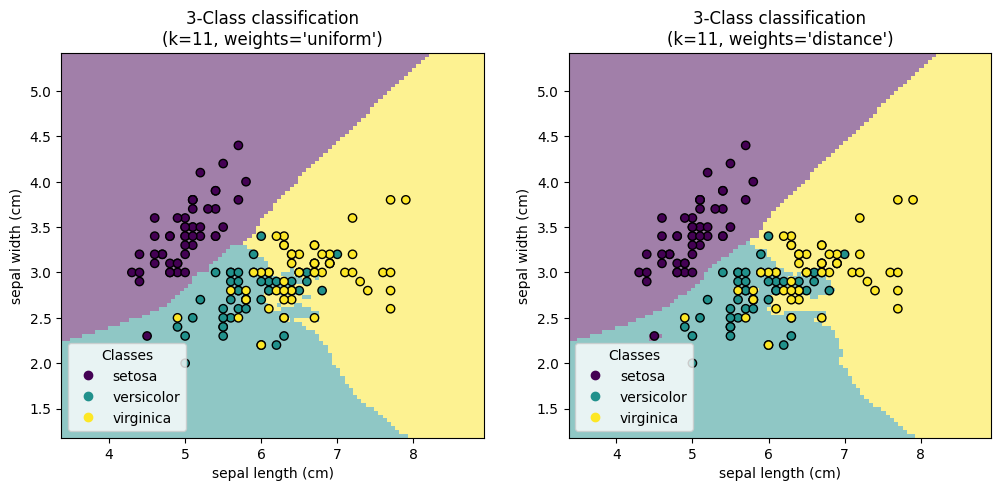

In [ ]:
from sklearn.inspection import DecisionBoundaryDisplay

_, axs = plt.subplots(ncols=2, figsize=(12, 5))

for ax, weights in zip(axs, ("uniform", "distance")):
    clf.set_params(knn__weights=weights).fit(X_train, y_train)
    disp = DecisionBoundaryDisplay.from_estimator(
        clf,
        X_test,
        response_method="predict",
        plot_method="pcolormesh",
        xlabel=iris.feature_names[0],
        ylabel=iris.feature_names[1],
        shading="auto",
        alpha=0.5,
        ax=ax,
    )
    scatter = disp.ax_.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, edgecolors="k")
    disp.ax_.legend(
        scatter.legend_elements()[0],
        iris.target_names,
        loc="lower left",
        title="Classes",
    )
    _ = disp.ax_.set_title(
        f"3-Class classification\n(k={clf[-1].n_neighbors}, weights={weights!r})"
    )

plt.show()

#### **2. Random Forest**

<img src="https://drive.google.com/uc?export=view&id=1HWt26uC2FJCjEnptYGCL2kdRcjIhrYpV" alt="Supervised Learning Workshop" width="500">

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

iris = load_iris()

df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target

X = df.iloc[:, :-1].values
y = df['target'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

n_estimators = 100
rf = RandomForestClassifier(n_estimators=n_estimators, random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred, target_names=iris.target_names)

print(f'Accuracy: {accuracy:.2f}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)


Accuracy: 1.00
Confusion Matrix:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]
Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



#### **3. Naive Bayes’ Classifier**

<img src="https://miro.medium.com/v2/resize:fit:828/format:webp/1*VGAoUgY28wygHsD-FXH4mg.jpeg" width="50%">


In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

iris = load_iris()

df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target

X = df.iloc[:, :-1].values
y = df['target'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

nb = GaussianNB()
nb.fit(X_train, y_train)

y_pred = nb.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred, target_names=iris.target_names)

print(f'Accuracy: {accuracy:.2f}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)


Accuracy: 0.98
Confusion Matrix:
[[19  0  0]
 [ 0 12  1]
 [ 0  0 13]]
Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      0.92      0.96        13
   virginica       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45



[Naive Bayes Documentation](https://scikit-learn.org/stable/modules/naive_bayes.html)

# Session 2:

In [ ]:
from sklearn.datasets import load_iris
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

iris = load_iris()
X_iris = iris.data
y_iris = iris.target

X_train_iris, X_test_iris, y_train_iris, y_test_iris = train_test_split(X_iris, y_iris, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_iris = scaler.fit_transform(X_train_iris)
X_test_iris = scaler.transform(X_test_iris)


## **1. Support Vector Machine SVM:**

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

svm_model = SVC()
svm_model.fit(X_train_iris, y_train_iris)

y_pred_svm = svm_model.predict(X_test_iris)
svm_accuracy = accuracy_score(y_test_iris, y_pred_svm)
conf_matrix = confusion_matrix(y_test_iris, y_pred_svm)
class_report = classification_report(y_test_iris, y_pred_svm, target_names=iris.target_names)

print(f'SVM Accuracy (Iris): {svm_accuracy:.2f}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)


SVM Accuracy (Iris): 1.00
Confusion Matrix:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]
Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



## **2. Logistic Regression:**

In [ ]:
from sklearn.linear_model import LogisticRegression

logreg_model = LogisticRegression(max_iter=200)
logreg_model.fit(X_train_iris, y_train_iris)

y_pred_logreg = logreg_model.predict(X_test_iris)
logreg_accuracy = accuracy_score(y_test_iris, y_pred_logreg)
conf_matrix = confusion_matrix(y_test_iris, y_pred_svm)
class_report = classification_report(y_test_iris, y_pred_svm, target_names=iris.target_names)

print(f'Logistic Regression Accuracy (Iris): {logreg_accuracy:.2f}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)


Logistic Regression Accuracy (Iris): 1.00
Confusion Matrix:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]
Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



## **3. Linear Regression:**

In [ ]:
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()
X_diabetes = diabetes.data
y_diabetes = diabetes.target

X_train_diabetes, X_test_diabetes, y_train_diabetes, y_test_diabetes = train_test_split(X_diabetes, y_diabetes, test_size=0.3, random_state=42)

X_train_diabetes = scaler.fit_transform(X_train_diabetes)
X_test_diabetes = scaler.transform(X_test_diabetes)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

linreg_model = LinearRegression()
linreg_model.fit(X_train_diabetes, y_train_diabetes)

y_pred_linreg = linreg_model.predict(X_test_diabetes)
linreg_mse = mean_squared_error(y_test_diabetes, y_pred_linreg)
print(f'Linear Regression MSE (Diabetes): {linreg_mse:.2f}')

Linear Regression MSE (Diabetes): 2821.75
